In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
def generate_2mmpp_trace(T_max, lambda0, lambda1, q01, q10, seed=None):
    """
    Generate a 2-state MMPP traffic trace.

    Parameters:
    - T_max (float): total simulation time (in seconds)
    - lambda0 (float): Poisson rate in state 0
    - lambda1 (float): Poisson rate in state 1
    - q01 (float): transition rate from state 0 to state 1
    - q10 (float): transition rate from state 1 to state 0
    - seed (int or None): random seed

    Returns:
    - arrivals (list of float): timestamps of Poisson arrivals
    - state_times (list of tuples): (start_time, end_time, state, rate) for each state period
    """
    # if seed is not None:
    #     np.random.seed(seed)

    arrivals = []
    state_times = []
    current_time = 0.0
    state = np.random.choice([0, 1])  # randomly start in state 0 or 1

    while current_time < T_max:
        # Determine time until next state change
        if state == 0:
            holding_time = np.random.exponential(1.0 / q01)
            rate = lambda0
        else:
            holding_time = np.random.exponential(1.0 / q10)
            rate = lambda1

        end_time = min(current_time + holding_time, T_max)

        # Generate Poisson arrivals in this state
        duration = end_time - current_time
        num_arrivals = np.random.poisson(rate * duration)
        arrivals_in_state = np.sort(np.random.uniform(current_time, end_time, num_arrivals))
        arrivals.extend(arrivals_in_state)
        state_times.append((current_time, end_time, state, rate, num_arrivals))

        # Update time and switch state
        current_time = end_time
        state = 1 - state  # switch state

    return np.array(arrivals), state_times


In [2]:
import matplotlib.pyplot as plt

T_max = 300
lambda0 = 50
lambda1 = 120
q01 = 0.2
q10 = 0.6

arrivals, state_segments = generate_2mmpp_trace(T_max, lambda0, lambda1, q01, q10, seed = 42)

# interarrival = []
# for i in range(1,len(arrivals)):
#     interarrival.append(arrivals[i]-arrivals[i-1])

# plt.figure(figsize = (10,5))
# plt.plot(interarrival, linewidth = 0.75, marker = 'x')
# plt.xlabel("Request Number")
# plt.ylabel("Time(sec)")

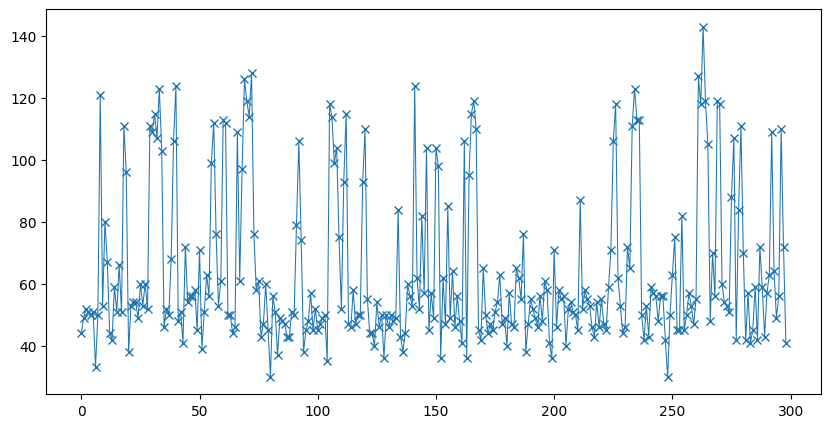

In [3]:
start = 1
req_per_sec_mmpp= []
sum=0
for i in range(len(arrivals)):
    if(arrivals[i]<start):
        sum+=1
    else:
        req_per_sec_mmpp.append(sum)
        sum=1
        start+=1

plt.figure(figsize = (10,5))
plt.plot(req_per_sec_mmpp, marker = 'x', linewidth = 0.75)

In [ ]:
print(state_segments)
sum =0
num_req = 0
for ele in state_segments:
    sum+= ele[4]*ele[3]
    num_req+=ele[4]

sum/=num_req
print(sum)

[(0.0, 7.961502670278612, np.int64(0), 50, 378), (7.961502670278612, 8.675214528386368, np.int64(1), 120, 104), (8.675214528386368, 8.973242191545475, np.int64(0), 50, 14), (8.973242191545475, 9.2114586063853, np.int64(1), 120, 27), (9.2114586063853, 10.590784988301882, np.int64(0), 50, 61), (10.590784988301882, 11.302663089411471, np.int64(1), 120, 86), (11.302663089411471, 17.9663776710537, np.int64(0), 50, 335), (17.9663776710537, 19.716878309336266, np.int64(1), 120, 204), (19.716878309336266, 23.634785508072248, np.int64(0), 50, 180), (23.634785508072248, 23.816525358172793, np.int64(1), 120, 23), (23.816525358172793, 29.234636627389463, np.int64(0), 50, 289), (29.234636627389463, 34.766822784671234, np.int64(1), 120, 644), (34.766822784671234, 38.49758615664571, np.int64(0), 50, 187), (38.49758615664571, 40.87341718631193, np.int64(1), 120, 268), (40.87341718631193, 50.268889895671045, np.int64(0), 50, 503), (50.268889895671045, 50.50800150588606, np.int64(1), 120, 28), (50.50800

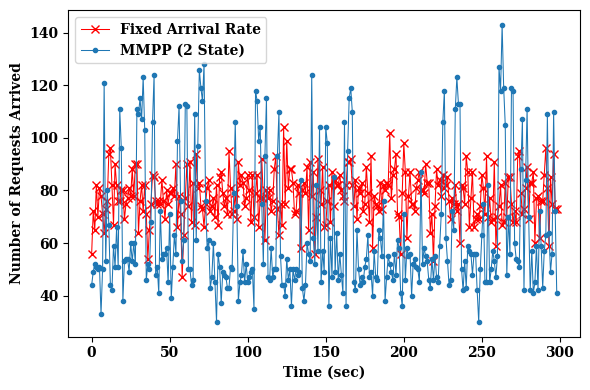

In [ ]:
T_max = 300
lambda0 = 78.25
lambda1 = 78.25
q01 = 2.0
q10 = 2.5

arrivals, state_segments = generate_2mmpp_trace(T_max, lambda0, lambda1, q01, q10, seed = 42)

interarrival = []
for i in range(1,len(arrivals)):
    interarrival.append(arrivals[i]-arrivals[i-1])

# plt.figure(figsize = (10,5))
# plt.plot(interarrival, linewidth = 0.75, marker = 'x')
# plt.xlabel("Request Number")
# plt.ylabel("Time(sec)")
start = 1
req_per_sec= []
sum=0
for i in range(len(arrivals)):
    if(arrivals[i]<start):
        sum+=1
    else:
        req_per_sec.append(sum)
        sum=1
        start+=1

import matplotlib.pyplot as plt
import matplotlib as mpl

# Set to generic serif and bold
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.titlesize'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['ytick.labelsize'] = 'medium'
mpl.rcParams['legend.fontsize'] = 'medium'

# Plot
plt.figure(figsize=(6, 4))
plt.plot(req_per_sec, marker='x', linewidth=0.75, color='red', label="Fixed Arrival Rate")
plt.plot(req_per_sec_mmpp, marker='.', linewidth=0.75, label="MMPP (2 State)")
plt.xlabel("Time (sec)", fontweight='bold')
plt.ylabel("Number of Requests Arrived", fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
T_max = 75       # simulate for 60 seconds
lambda0 = 50        # arrivals/sec in state 0 (low load)
lambda1 = 300       # arrivals/sec in state 1 (high load)
q01 = 0.2           # rate of switching from 0 → 1 (avg time in state 0 = 5s)
q10 = 0.2           # rate of switching from 1 → 0 (avg time in state 1 = 10s)

arrivals, state_segments = generate_2mmpp_trace(T_max, lambda0, lambda1, q01, q10, seed=42)
print(len(arrivals))

def find_arrival_rates_from_data(arrivals, state_segments):
    arrival_rates_from_data = []
    curr_idx = 0
    for a in arrivals:
        low= state_segments[curr_idx][0]
        high = state_segments[curr_idx][1]
        rate= state_segments[curr_idx][3]
        if(low<=a<high):
            arrival_rates_from_data.append(rate)
        else:
            curr_idx+=1
            rate = state_segments[curr_idx][3]
            arrival_rates_from_data.append(rate)
    return arrival_rates_from_data

arrival_rates_first_type = find_arrival_rates_from_data(arrivals=arrivals, state_segments=state_segments)
# print(arrival_rates_first_type)

16830


In [ ]:
T_max = 75        # simulate for 60 seconds
lambda0 = 25        # arrivals/sec in state 0 (low load)
lambda1 = 150       # arrivals/sec in state 1 (high load)
q01 = 0.3           # rate of switching from 0 → 1 (avg time in state 0 = 5s)
q10 = 0.5           # rate of switching from 1 → 0 (avg time in state 1 = 10s)

arrivals_second_type, state_segments_second_type = generate_2mmpp_trace(T_max, lambda0, lambda1, q01, q10, seed=42)
arrival_rates_second_type = find_arrival_rates_from_data(arrivals=arrivals_second_type, state_segments=state_segments_second_type)
print(len(arrivals_second_type))

6731


In [ ]:
T_max = 75        # simulate for 60 seconds
lambda0 = 10        # arrivals/sec in state 0 (low load)
lambda1 = 50       # arrivals/sec in state 1 (high load)
q01 = 0.3           # rate of switching from 0 → 1 (avg time in state 0 = 5s)
q10 = 0.5           # rate of switching from 1 → 0 (avg time in state 1 = 10s)

arrivals_third_type, state_segments_third_type = generate_2mmpp_trace(T_max, lambda0, lambda1, q01, q10, seed=42)
arrival_rates_third_type = find_arrival_rates_from_data(arrivals=arrivals_third_type, state_segments=state_segments_third_type)
print(len(arrivals_third_type))

1979


In [ ]:
T_max = 75        # simulate for 60 seconds
lambda0 = 1        # arrivals/sec in state 0 (low load)
lambda1 = 25       # arrivals/sec in state 1 (high load)
q01 = 0.3           # rate of switching from 0 → 1 (avg time in state 0 = 5s)
q10 = 0.5           # rate of switching from 1 → 0 (avg time in state 1 = 10s)

arrivals_fourth_type, state_segments_fourth_type = generate_2mmpp_trace(T_max, lambda0, lambda1, q01, q10, seed=42)
arrival_rates_fourth_type = find_arrival_rates_from_data(arrivals=arrivals_fourth_type, state_segments=state_segments_fourth_type)
print(len(arrivals_fourth_type))

1053


In [ ]:
import pandas as pd

first_type_arrivals= pd.DataFrame(arrivals)
first_type_arrivals['num_prefill_tokens'] = 25
first_type_arrivals['num_decode_tokens'] = 25
first_type_arrivals['prompt_type'] = 'type1'
first_type_arrivals['arrival_rate_update'] = arrival_rates_first_type
first_type_arrivals = first_type_arrivals.rename(columns={0: 'arrived_at'})

second_type_arrivals = pd.DataFrame(arrivals_second_type)
second_type_arrivals['num_prefill_tokens'] = 25
second_type_arrivals['num_decode_tokens'] = 75
second_type_arrivals['prompt_type'] = 'type2'
second_type_arrivals['arrival_rate_update'] = arrival_rates_second_type
second_type_arrivals = second_type_arrivals.rename(columns = {0: 'arrived_at'})

third_type_arrivals = pd.DataFrame(arrivals_third_type)
third_type_arrivals['num_prefill_tokens'] = 25
third_type_arrivals['num_decode_tokens'] = 125
third_type_arrivals['prompt_type'] = 'type3'
third_type_arrivals['arrival_rate_update'] = arrival_rates_third_type
third_type_arrivals = third_type_arrivals.rename(columns = {0: 'arrived_at'})

fourth_type_arrivals = pd.DataFrame(arrivals_fourth_type)
fourth_type_arrivals['num_prefill_tokens'] = 25
fourth_type_arrivals['num_decode_tokens'] = 175
fourth_type_arrivals['prompt_type'] = 'type4'
fourth_type_arrivals['arrival_rate_update'] = arrival_rates_fourth_type
fourth_type_arrivals = fourth_type_arrivals.rename(columns = {0: 'arrived_at'})

print(first_type_arrivals.head())
print(second_type_arrivals.head())
print(third_type_arrivals.head())
print(fourth_type_arrivals.head())

total_df = pd.concat([first_type_arrivals, second_type_arrivals, third_type_arrivals, fourth_type_arrivals])
total_df = total_df.sort_values(by='arrived_at')

print(total_df)

   arrived_at  num_prefill_tokens  num_decode_tokens prompt_type  \
0    0.013938                  25                 25       type1   
1    0.036835                  25                 25       type1   
2    0.054397                  25                 25       type1   
3    0.092297                  25                 25       type1   
4    0.110436                  25                 25       type1   

   arrival_rate_update  
0                   50  
1                   50  
2                   50  
3                   50  
4                   50  
   arrived_at  num_prefill_tokens  num_decode_tokens prompt_type  \
0    0.078594                  25                 75       type2   
1    0.136988                  25                 75       type2   
2    0.167568                  25                 75       type2   
3    0.168930                  25                 75       type2   
4    0.191416                  25                 75       type2   

   arrival_rate_update  
0      

In [ ]:
import pandas as pd

df = pd.DataFrame(total_df)
df.to_csv('mmpp2_four_types_with_arrival_rates.csv')

In [ ]:
print(arrivals)

[1.39380666e-02 3.68347723e-02 5.43966539e-02 ... 7.49908773e+01
 7.49979070e+01 7.49982650e+01]


In [ ]:
T_max = 75        # simulate for 60 seconds
lambda0 = 20        # arrivals/sec in state 0 (low load)
lambda1 = 100       # arrivals/sec in state 1 (high load)
q01 = 0.2           # rate of switching from 0 → 1 (avg time in state 0 = 5s)
q10 = 0.6           # rate of switching from 1 → 0 (avg time in state 1 = 10s)

arrivals_second_type, state_segments_second_type = generate_2mmpp_trace(T_max, lambda0, lambda1, q01, q10, seed=42)
arrival_rates_second_type = find_arrival_rates_from_data(arrivals=arrivals_second_type, state_segments=state_segments_second_type)
print(len(arrivals_second_type))

2985


Text(0, 0.5, 'TIme (sec)')

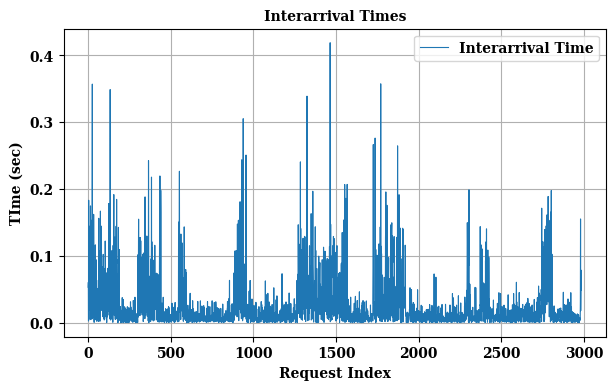

In [ ]:
data = []

for i in range(len(arrivals_second_type)):
    if i==0:
        data.append(arrivals_second_type[i])
    else:
        data.append(arrivals_second_type[i]-arrivals_second_type[i-1])

plt.figure(figsize = (7,4))
plt.plot(data, label = "Interarrival Time", linewidth = 0.8)
plt.title("Interarrival Times")
plt.legend()
plt.grid(True)
plt.xlabel("Request Index")
plt.ylabel("TIme (sec)")

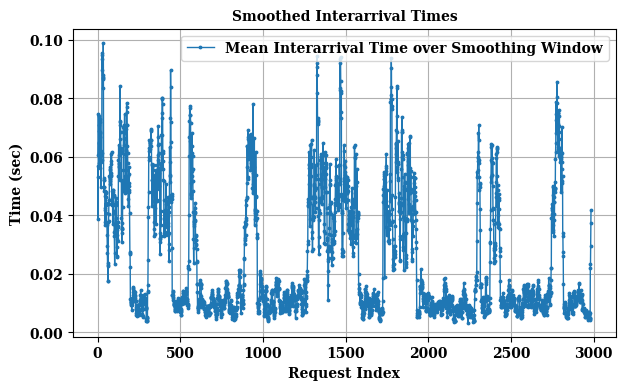

In [ ]:
x2new_arr = []
num_req_consider = 10

for i in range(len(arrivals_second_type)):
    if(i>num_req_consider):
        x2new_arr.append(np.mean(data[i-num_req_consider:i]))
    else:
        x2new_arr.append(np.mean(data[:i]))

plt.figure(figsize=(7,4))
# plt.hlines(y=[300,50], xmin=0, xmax=6100, colors=['r','r'])
plt.plot(x2new_arr, marker = '.', label = "Mean Interarrival Time over Smoothing Window", linewidth = 1, markersize = 3.5)
plt.xlabel("Request Index")
plt.ylabel("Time (sec)")
plt.title("Smoothed Interarrival Times")
plt.grid(True)
plt.legend()

[209, 311, 465, 559, 1594, 1731, 1942, 2292, 2330, 2384, 2449, 2827]
[209, 210, 211, 212, 213, 214, 215, 216, 217, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846]


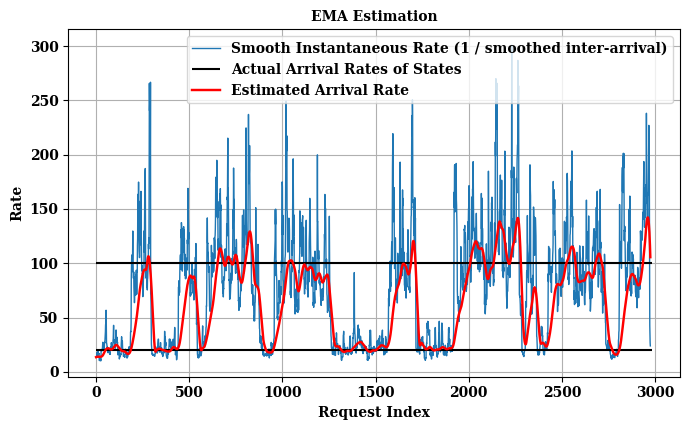

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


class OnlineRateEstimator:
    def __init__(self, alpha=0.05):
        self.alpha = alpha
        self.ema = None
        self.rates = []

    def update(self, x):
        if self.ema is None:
            self.ema = x
        else:
            self.ema = self.alpha * x + (1 - self.alpha) * self.ema
        self.rates.append(1 / self.ema)
        return self.rates[-1]

class LikelihoodRatioTest:
    def __init__(self, window_size=100):
        self.window_size = window_size
        self.changepoints = []

    def detect(self, data):
        cps = []
        for t in range(self.window_size, len(data)):
            window = data[t - self.window_size:t]
            mid = self.window_size // 2
            x1, x2 = window[:mid], window[mid:]
            lambda1 = np.mean(x1)
            lambda2 = np.mean(x2)
            if lambda1 == 0 or lambda2 == 0:
                continue
            ll1 = np.sum(np.log(1 / lambda1 * np.exp(-np.array(x1) / lambda1)))
            ll2 = np.sum(np.log(1 / lambda2 * np.exp(-np.array(x2) / lambda2)))
            ll_full = np.sum(np.log(1 / np.mean(window) * np.exp(-np.array(window) / np.mean(window))))
            stat = ll1 + ll2 - ll_full
            if stat > 10:  # Threshold: tune based on dataset
                cps.append(t)
        self.changepoints = cps
        return cps

# === Example Data ===
np.random.seed(42)
data= np.array(x2new_arr[9:]).astype(float)

# === Estimation and Detection ===
estimator = OnlineRateEstimator(alpha=0.05)
lrt = LikelihoodRatioTest(window_size=50)

estimated_rates = []
for x in data:
    rate = estimator.update(x)
    estimated_rates.append(rate)

changepoints = lrt.detect(data)

def reduce_changepoints(changepoints, min_gap=5):
    reduced = []
    prev = None
    for cp in changepoints:
        if prev is None or cp - prev > min_gap:
            reduced.append(cp)
        prev = cp
    return reduced

smoothed_rates = savgol_filter(estimated_rates, window_length=51, polyorder=3)
s_smoothed_rates = savgol_filter(smoothed_rates, window_length=101, polyorder=3)

filtered_changepoints = reduce_changepoints(changepoints, min_gap=5)
print(filtered_changepoints)
print(changepoints)

# === Plot ===
plt.figure(figsize=(7, 4.4))
plt.plot(1/data, label='Smooth Instantaneous Rate (1 / smoothed inter-arrival)', linewidth = 1)
# plt.plot(estimated_rates, label='EMA Estimated Rate', color='blue')
# plt.plot(s_smoothed_rates, color='magenta', label='Smoothed Rate (Savitzky–Golay)')
plt.hlines(y=[100,20], xmin=0, xmax=len(arrivals_second_type), colors=['black','black'], label = "Actual Arrival Rates of States")
plt.plot(smoothed_rates, color='red', label='Estimated Arrival Rate', linewidth=1.75)
# for cp in filtered_changepoints:
#     plt.axvline(cp, color='red', linestyle='--', label='Change Point' if cp == changepoints[0] else None)
plt.title("EMA Estimation")
plt.xlabel("Request Index")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


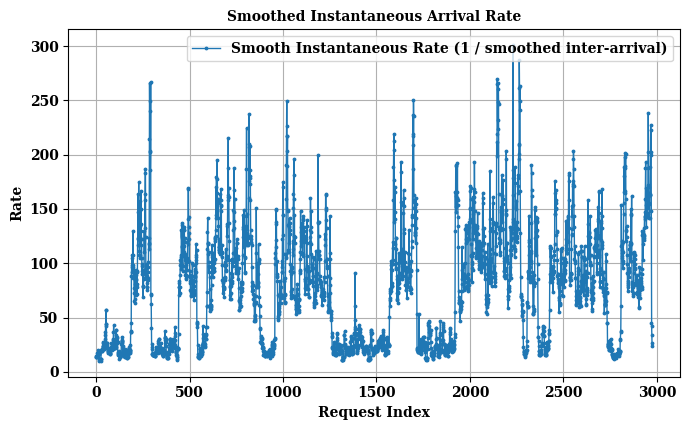

In [ ]:
# === Plot ===
plt.figure(figsize=(7, 4.4))
plt.plot(1/data, label='Smooth Instantaneous Rate (1 / smoothed inter-arrival)',linewidth = 1,marker = '.', markersize = 3.5)
# plt.plot(estimated_rates, label='EMA Estimated Rate', color='blue')
# plt.plot(s_smoothed_rates, color='magenta', label='Smoothed Rate (Savitzky–Golay)')
# plt.plot(smoothed_rates, color='red', label='Estimated Arrival Rate', linewidth = 1.5)
# for cp in filtered_changepoints:
#     plt.axvline(cp, color='green', linestyle='--', label='Change Point' if cp == changepoints[0] else None)
plt.title("Smoothed Instantaneous Arrival Rate")
plt.xlabel("Request Index")
plt.ylabel("Rate")
# plt.hlines(y=[100,20], xmin=0, xmax=3651, colors=['black','black'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

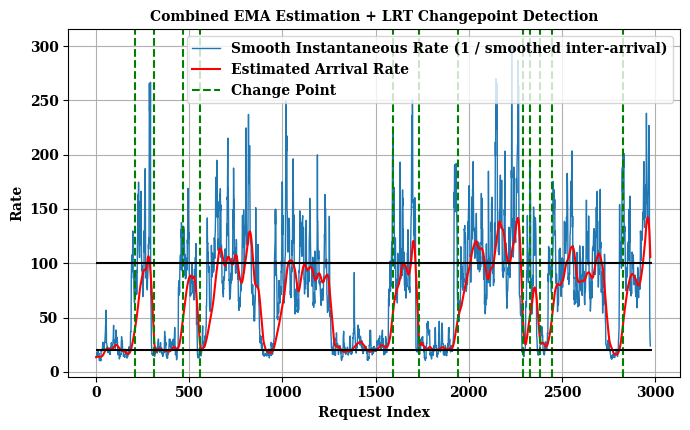

In [ ]:
# === Plot ===
plt.figure(figsize=(7, 4.4))
plt.plot(1/data, label='Smooth Instantaneous Rate (1 / smoothed inter-arrival)', linewidth = 1)
# plt.plot(estimated_rates, label='EMA Estimated Rate', color='blue')
# plt.plot(s_smoothed_rates, color='magenta', label='Smoothed Rate (Savitzky–Golay)')
plt.plot(smoothed_rates, color='red', label='Estimated Arrival Rate', linewidth = 1.5)
for cp in filtered_changepoints:
    plt.axvline(cp, color='green', linestyle='--', label='Change Point' if cp == changepoints[0] else None)
plt.title("Combined EMA Estimation + LRT Changepoint Detection")
plt.xlabel("Request Index")
plt.ylabel("Rate")
plt.hlines(y=[100,20], xmin=0, xmax=len(arrivals_second_type), colors=['black','black'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()